# Part I - Prosper Loan Data Analysis
## by Amanuel Loeta

## Introduction
This prosper loan data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. I will explore and try show some finding from the dataset. Let's continue.


## Preliminary Wrangling

Let's import all needed packages.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Let us Load our dataset and see some sample from the data

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
14121,C02734305177514602BE62C,389322,2008-08-27 14:45:27.840000000,AA,36,Completed,2009-01-21 00:00:00,0.07680,0.0700,0.0600,...,-22.65,0.0,0.0,0.0,0.0,1.0,0,0,0.0,314
33308,01CE3568870870862BB93E3,696946,2013-01-09 13:18:40.907000000,NaN,36,Current,NaN,0.25013,0.2124,0.2024,...,-56.64,0.0,0.0,0.0,0.0,1.0,0,0,0.0,63
51926,A7F63600910651474A8F2FF,1180746,2014-02-02 11:15:20.460000000,NaN,36,Current,NaN,0.14206,0.1139,0.1039,...,-15.34,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
92209,26813430998898942BF6682,400269,2008-09-18 06:36:33.647000000,A,36,Completed,2010-03-09 00:00:00,0.08864,0.0749,0.0649,...,-14.14,0.0,0.0,0.0,0.0,1.0,0,0,0.0,132
101972,29FF36041492992821E52CC,1241904,2014-03-03 09:06:03.797000000,NaN,36,Current,NaN,0.14039,0.1119,0.1019,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


Let's explore our dataset. How about it's shape, it's structure, and other details.

In [3]:
# Shape of our dataset
df.shape

(113937, 81)

In [4]:
#Describtion of the dataset
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
# Information for our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

### What is the structure of your dataset?

This dataset contains 113,939 rows of data and 81 variables(columns). It contains borrower's information and loan details.

### What is/are the main feature(s) of interest in your dataset?

My main interst in the dataset is about the borrower's detail information. What's their occupation, their state and other details.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The following features will help and support my investigation.  

        LoanStatus:  The current status of the loan.
        BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
        BorrowerRate: The Borrower's interest rate for this loan. 
        ListingCategory: The category of the listing that the borrower selected when posting their listing.
        BorrowerState: The state in which the borrower resides.
        Occupation: The Occupation selected by the Borrower at the time they created the listing.
        EmploymentStatus: The employment status of the borrower at the time they posted the listing.
        IsBorrowerHomeowner: Tells if the borrower is a home owner.
        StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.
        DebtToIncomeRatio: The debt to income ratio of the borrower at the time the credit profile was pulled.

## Univariate Exploration

> In this section, we will investigate distributions of individual variables.

### Q. In what loan status are most borrowers found?
To answer this question let's count LoanStatus column values with each values.

In [62]:
#Let's see our loan status values
loan_status = df.LoanStatus.value_counts()
loan_status

Current                   52478
Completed                 35340
Chargedoff                10751
Defaulted                  4763
Past Due (1-15 days)        722
Past Due (31-60 days)       327
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       242
FinalPaymentInProgress      189
Past Due (>120 days)         14
Cancelled                     5
Name: LoanStatus, dtype: int64

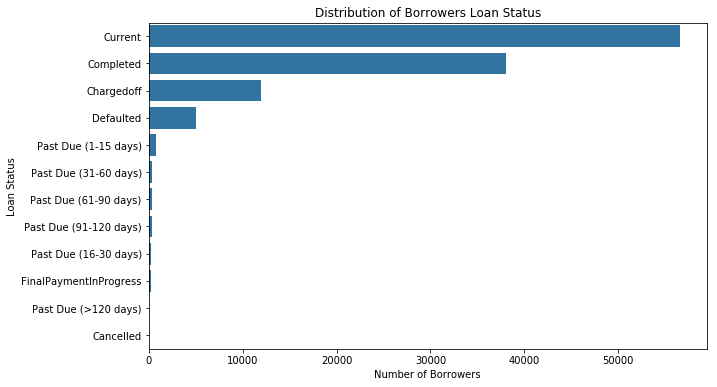

In [7]:
#Plotting loan status distribution
fig = plt.figure(figsize=(10,6))
default_color = sb.color_palette()[0]
sb.countplot(y='LoanStatus', data=df, order=loan_status.index, color = default_color)
plt.title('Distribution of Borrowers Loan Status')
plt.ylabel('Loan Status')
plt.xlabel('Number of Borrowers')
plt.show()

As plotted above on the visualization, the loan status distribution is mostly found on Current and secondly on Completed.  
This shows us most borrowers loan is status are still ongoing, they haven't completed their loan. And also we can see that there are also very little borrowers have passed their due date.

### Q. In which States are most borrowers found?
To answer this question using the LoanStatus column let's count and peak top 15 states which have a most borrowers from our dataset.

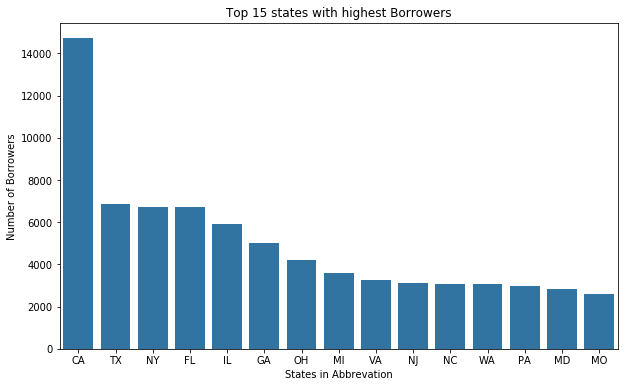

In [8]:
#Selecting 15 states with high borrower count
top15_state = df.BorrowerState.value_counts()[:15].values
top15_state_label = df.BorrowerState.value_counts()[:15].index

#Plotting states with highest Borrowers
fig = plt.figure(figsize=(10,6))
sb.barplot(x=top15_state_label, y=top15_state, data=df, color = default_color)
plt.title('Top 15 states with highest Borrowers')
plt.ylabel('Number of Borrowers')
plt.xlabel('States in Abbrevation')
plt.show()

State of <b>California</b> is the state with highest borrowers, followed by <b>Texas</b> and <b>New York</b>.

### Q. What is most common loan causes for the borrowers?
Let's look the reasons borrowers listed for taking the loan and find out which one is most common. As we see below the listing catagory is in numeric format let's change the to thier according Sting values.

In [9]:
# Below function will get a numeric value and return a string value for each key.
def replace_numeric(numeric):
    num_list = {0:'Not Available', 1:'Debt Consolidation',2:'Home Improvement',
                 3:'Business',4:'Personal Loan',5:'Student Use',6:'Auto',7:'Other',
                 8:'Baby&Adoption',9:'Boat',10:'Cosmetic Procedure',
                 11:'Engagement Ring',12:'Green Loans',13:'Household Expenses',
                 14:'Large Purchases',15:'Medical/Dental',16:'Motorcycle',17:'RV',
                 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}
    return num_list[numeric]
# Creating a column and Replacing our ListingCategory numeric value to string
df['ListingCategory'] = df['ListingCategory (numeric)'].apply(replace_numeric)
# Dropping Numeric Column
df.drop(['ListingCategory (numeric)'], axis=1, inplace=True)

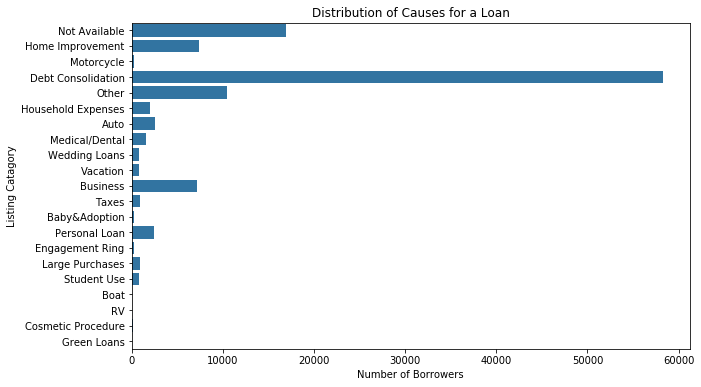

In [10]:
#Plotting Distribution of Causes for a Loan
fig = plt.figure(figsize=(10,6))
sb.countplot(y='ListingCategory', data=df, color = default_color)
plt.title('Distribution of Causes for a Loan')
plt.ylabel('Listing Catagory')
plt.xlabel('Number of Borrowers')
plt.show()

From the ploted graph we can observe that the main cause for a loan is <b>Debt Consolidation</b>.  
Debt consolidation holds the main cause followed by home improvement and business. And also as we can see some of the causes are not listed so they are stated as Not Availabe. Somehow that will affect some distribution but still Debt Consolidation holds most causes.

### Q. Employment status of  a Borrowors?
Let us see Employment status of a Borrowors.

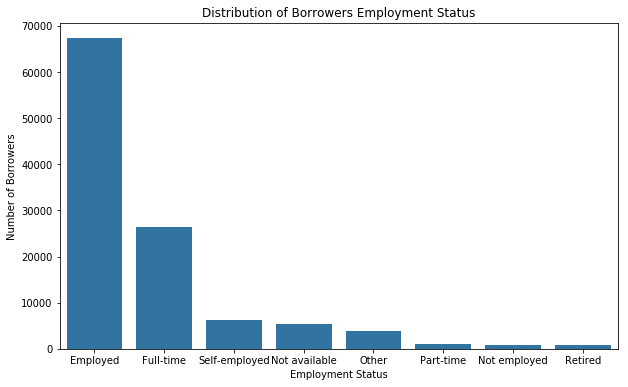

In [11]:
# plotting Distribution of Borrowers Employment Status
emp_status = df.EmploymentStatus.value_counts().index
fig = plt.figure(figsize=(10,6))
sb.countplot(x='EmploymentStatus', data=df, order=emp_status, color = default_color)
plt.title('Distribution of Borrowers Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Borrowers')
plt.show()

When we observe borrowors employment status most of them are employed.  
The list of them are Retired and Not Employed. on the given data we can see that there are missing data which listed as Not available.

### Q. How many of the Borrowers Own Home?
Let us see how many of the borrowers own home.

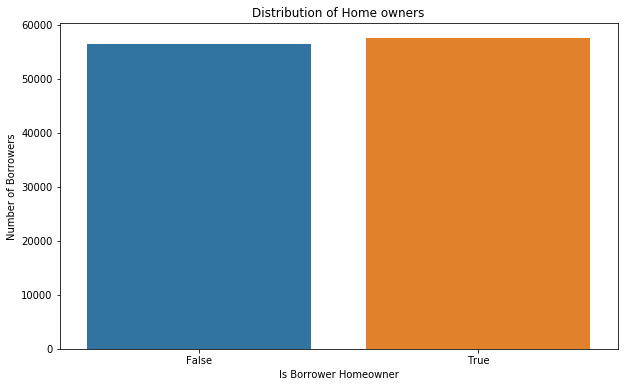

In [12]:
#Plotting Distribution of Home owners
fig = plt.figure(figsize=(10,6))
sb.countplot(x='IsBorrowerHomeowner', data=df)
plt.title('Distribution of Home owners')
plt.xlabel('Is Borrower Homeowner')
plt.ylabel('Number of Borrowers')
plt.show()

On this analysis of home owners we can observe that mostly half of them are home owner and half of them are not.  
This shows as there are almost 50-50 distrubition are among them.

### Q. Distribution of Borrower's Interest Rate
Let us observe the disttibutions of borrower's interest rate.

In [63]:
#structure of borrower interst rate
df.BorrowerRate.describe()

count    105383.000000
mean          0.190593
std           0.074101
min           0.000000
25%           0.131400
50%           0.180000
75%           0.249200
max           0.497500
Name: BorrowerRate, dtype: float64

It appears we have interest rate ranging from 0% to 49.7% with maximum rate.  
But let's plot and see inerest rate distributions.

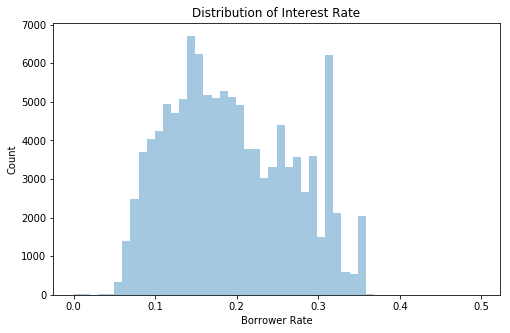

In [14]:
#Plotting distribution of interest rate 
plt.figure(figsize = [8,5])
sb.distplot(df.BorrowerRate, kde = False)
plt.title('Distribution of Interest Rate')
plt.xlabel('Borrower Rate')
plt.ylabel('Count');

As we see above our interest rate distribution mostly found between 5% and 35% so let's look our distribution in that range.

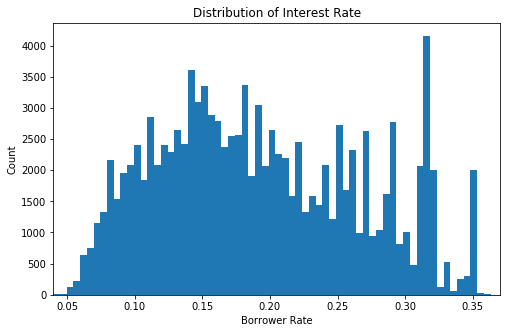

In [15]:
#plotting Distribution of Interest Rate
plt.figure(figsize=[8, 5])
plt.hist(data=df, x = 'BorrowerRate', bins = 100)
plt.xlim([0.04,0.37])
plt.title('Distribution of Interest Rate')
plt.xlabel('Borrower Rate')
plt.ylabel('Count')
plt.show()

From the visualization as we expected the distribution falls between 5% and 35%.  
The largest bins falls on arround 32% intrest rate.

### Q. Distribution of Borrower's Monthly Income
From the following analysis we can obsever that Most of the borrower's monthly income are below 25,000 so let's zoom in to see details using the xlim patameters.

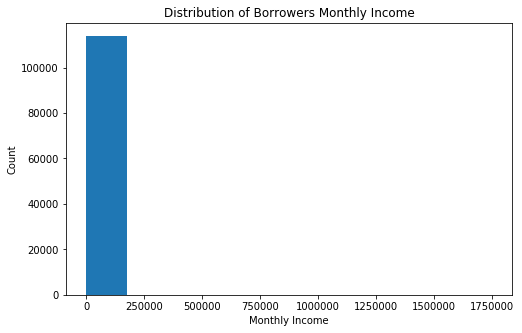

In [16]:
#Plotting Distribution of Borrowers Monthly Income
plt.figure(figsize=[8, 5])
plt.hist(data=df, x = 'StatedMonthlyIncome')
plt.title('Distribution of Borrowers Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()

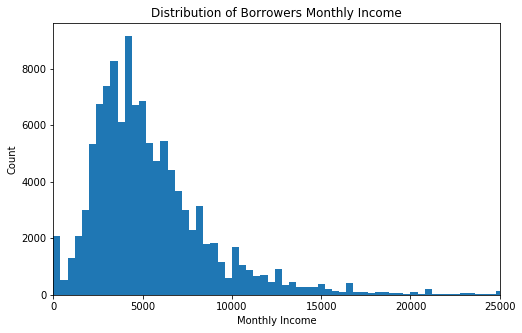

In [17]:
#Zooming the Borrowers Monthly Income plot
binsize = 400
bins = np.arange(0, 25000+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data=df, x = 'StatedMonthlyIncome', bins=bins)
plt.title('Distribution of Borrowers Monthly Income')
plt.xlim([0,25000])
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()

We clearly see that most of the borrowers income are between 3500 upto 6000. Above 25000 we can consider it as an outliners.  
Let's see the output using boxplot. It also shows us that the distribution of the income are mostly below 25000.

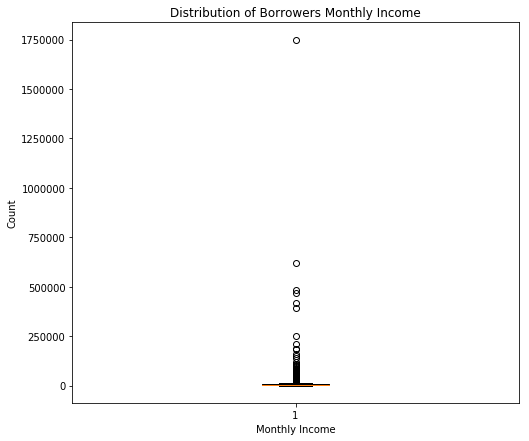

In [18]:
#Plotting Distribution of Borrowers Monthly Income
plt.figure(figsize=[8, 7])
plt.boxplot(data=df, x = 'StatedMonthlyIncome')
plt.title('Distribution of Borrowers Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()

### Q. Distribution of Borrower's Debt to Income Ratio
This column values shows a borrower debt to income ration. Let us see destribution among each borrower.

Let us drop Nan values from this column. Unless we can't plot to see more details.

In [19]:
#Dropping nan values from DebtToIncomeRatio column
df = df.dropna(subset=['DebtToIncomeRatio'])

In [20]:
#General structure detail of DebtToIncomeRatio
df.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

In our first analysis below we can see that there are some outliners values where debt to income ratio is larger than 1000% so let's zoom our plot to make an analysis. 

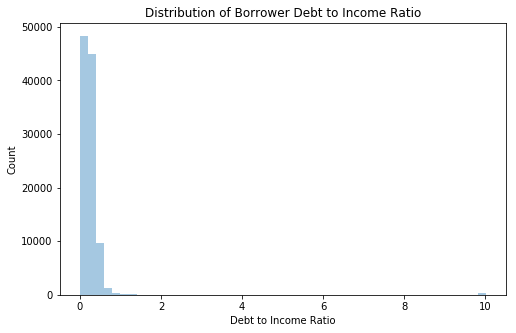

In [21]:
#Plotting Distribution of Borrower Debt to Income Ratio
plt.figure(figsize=[8, 5])
sb.distplot(df.DebtToIncomeRatio, kde = False)
plt.title('Distribution of Borrower Debt to Income Ratio')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count')
plt.show()

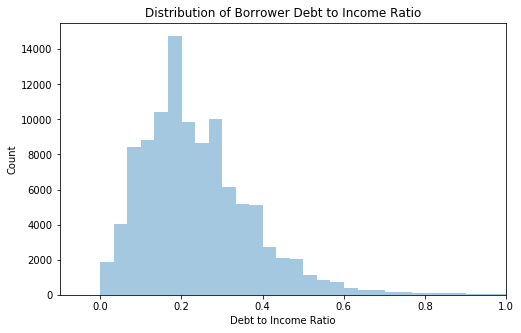

In [22]:
# Zoom plot of Distribution of Borrower Debt to Income Ratio
plt.figure(figsize=[8, 5])
sb.distplot(df.DebtToIncomeRatio, kde = False, bins = 300)
plt.xlim(-.1, 1)
plt.title('Distribution of Borrower Debt to Income Ratio')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count')
plt.show()

We can observe from the plot that most Borrowers debt to income ratio are around 20%.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

We have looked on our variables of interest which is LoanStatus, BorrowerAPR, ListingCategory, BorrowerState, BorrowerRate, EmploymentStatus, IsBorrowerHomeowner, StatedMonthlyIncome, and DebtToIncomeRatio. We have seen there distribution on the data set.  
On some of the variables there are some outliners values we have looked in to them closely and we've dropped out some of them and analysed on the normal distribution only.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Yes, on some of our variables we have changed the form of the data and made some tidness too. On listing catagory variable we have changed and replaced the numeric value to it's corresponding string value.  
And for DebtToIncomeRatio variable we have dropped Nan values for the plot function could find the min and max values. The null values are for the not availble ones.

## Bivariate Exploration

In this part of the bivariate exploration, we will investigate relationships between some pairs of variables from our
data that we have seen in univariate exploration.

### Q. Does the borrower Occupation affect Borrower APR

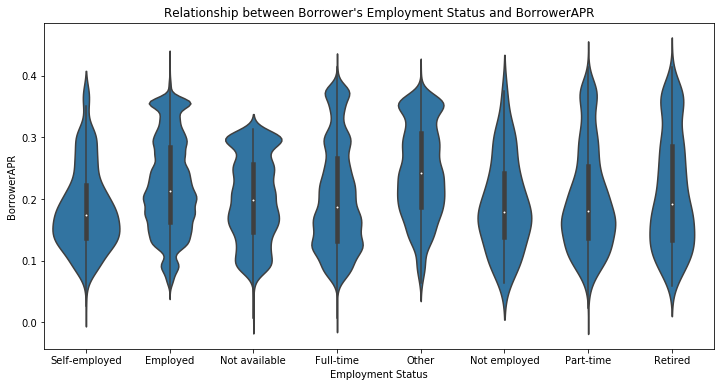

In [23]:
#Plotting relations between BorrowerAPR and EmploymentStatus
fig = plt.figure(figsize=(12,6))
sb.violinplot(x='EmploymentStatus', y='BorrowerAPR', data=df, color = default_color)
plt.title("Relationship between Borrower's Employment Status and BorrowerAPR")
plt.xlabel("Employment Status")
plt.ylabel('BorrowerAPR')
plt.show()

As the violin plot shows us most of them are the same. However, the <b>Borrower APR</b> is higher for borrower who retired and part-time employed.  
The <b>Borrower APR</b> is mostly distributed around 10% - 20% for each <b>Employment status</b>

### Q. How Borrower's monthly income affect Debt to income ratio

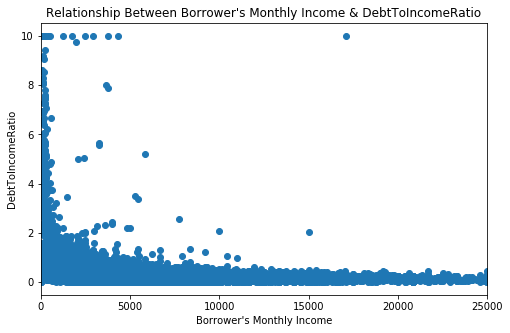

In [24]:
#Plotting relations between StatedMonthlyIncome and DebtToIncomeRatio
plt.figure(figsize=[8, 5])
plt.scatter(data=df, x = 'StatedMonthlyIncome', y = 'DebtToIncomeRatio')
plt.xlim([0,25000])
plt.title("Relationship Between Borrower's Monthly Income & DebtToIncomeRatio")
plt.ylabel('DebtToIncomeRatio')
plt.xlabel("Borrower's Monthly Income")
plt.show()

Form borrower's monthly income and DebtToIncomeRatio relationship plot we can see that there high <b>DebtToIncomeRatio</b> distrubtion for whose monthly income is lessthan 1000.  
We can conclude that the borrowers which have very less income have high <b>DebtToIncomeRatio</b>.

### Q. How is the loan status vary for Home owners

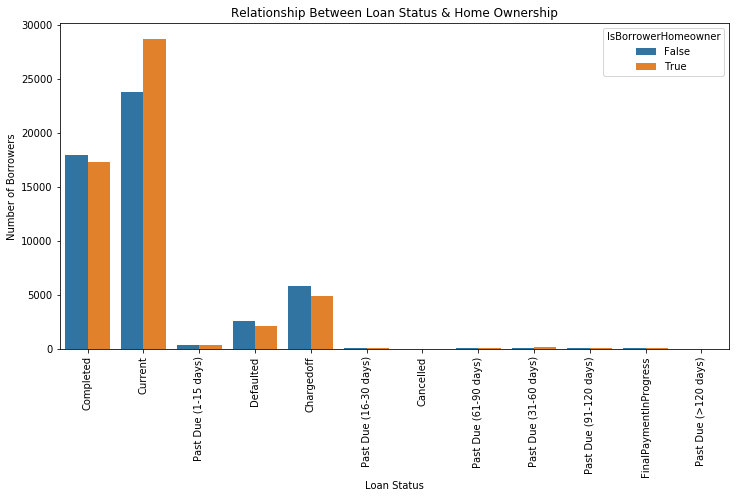

In [25]:
#Plotting relations between IsBorrowerHomeowner and LoanStatus
fig = plt.figure(figsize=(12,6))
sb.countplot(hue='IsBorrowerHomeowner', x='LoanStatus', data=df)
plt.title('Relationship Between Loan Status & Home Ownership')
plt.ylabel('Number of Borrowers')
plt.xlabel('Loan Status')
plt.xticks(rotation=90)
plt.show()

From the above Loan status distribution in home owners, we can see that borrowers who owns home have high in <b>Current</b> loan status and also approximatly the same or some less distribution than non home-owners in <b>Completed, Defaulted, and Chargedoff</b>. In other loan status because of small data they are almost equal distribution.

### Q. Does home owners have high Borrower Rate

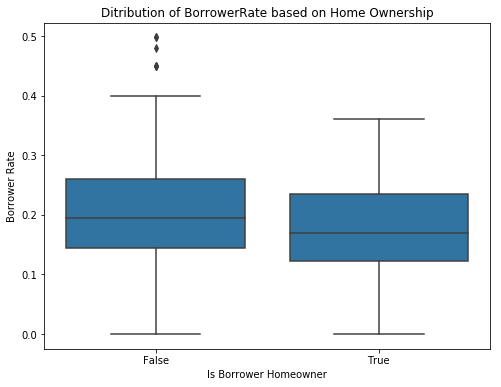

In [26]:
#Plotting relations between IsBorrowerHomeowner and BorrowerRate
fig = plt.figure(figsize=(8,6))
sb.boxplot(x='IsBorrowerHomeowner', y='BorrowerRate', data=df, color = default_color)
plt.title('Ditribution of BorrowerRate based on Home Ownership')
plt.ylabel('Borrower Rate')
plt.xlabel('Is Borrower Homeowner')
plt.show()

In this plot No that much difference is found among the home owners and non-home owners. Some how non-home owners Borrower's have slightely high <b>Borrower Rate</b> distrubtion than home owners.

### Q. Relationship between DebtToIncomeRatio and Borrower Rate

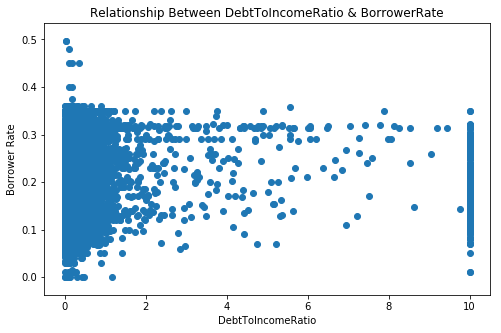

In [27]:
#Plotting relations between DebtToIncomeRatio and BorrowerRate
plt.figure(figsize=[8, 5])
plt.scatter(data=df, x = 'DebtToIncomeRatio', y = 'BorrowerRate')
plt.title("Relationship Between DebtToIncomeRatio & BorrowerRate")
plt.ylabel('Borrower Rate')
plt.xlabel("DebtToIncomeRatio")
plt.show()

From this quantitative features relationship it desn't seem like they have a coorelation between them.  
As our data plot shows us this two numeric variables which is <b>Borrower Rate</b> and <b>DebtToIncomeRation</b> have not positive or negative coorelation between them.

### Q. Relationship between  Borrower Rate and Borrower's Prosper Score ?

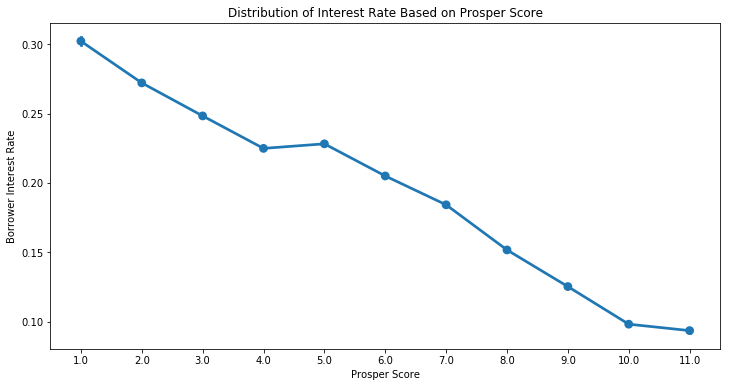

In [28]:
#Plotting relations between ProsperScore and BorrowerRate
fig = plt.figure(figsize=(12,6))
sb.pointplot(y='BorrowerRate', x='ProsperScore', data=df)
plt.title('Distribution of Interest Rate Based on Prosper Score')
plt.ylabel('Borrower Interest Rate')
plt.xlabel('Prosper Score')
plt.show()

From the above plot we can see that Borrower Rate and Prosper Score have high coorelation between them.  
They have a negative coorelation as we see when the prosper score increases borrowers interest rate decreases.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

From our features of interest, we have seen the realtionship between them. From the BorrowerAPR and Empployment status realtionship we have analyzed that there is a high borrower apr for borrower who have retired and part-time employed. And also for the qualitative vs qualitative plot on IsBorrowerHomeowner and LoanStatus relationship we have seen that home owners and non-home owners Borrower have some diffrence in <b>Current</b> loan status but they have approximatly simillar distribution on other loan status.  

On the other hand on the quantitative vs quantitative plot we explored on the relations between DebtToIncomeRatio and Borrower Rate. But, seems like they don't have a positive or a negative coorelation between them.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes, on the last quantitative vs quantitative plot between Borrower Rate and Prosper Score we have seen that

## Multivariate Exploration

In this part of the multivariate exploration we will explore using ProsperScore and Borrower interest rate by loan status and employment status.

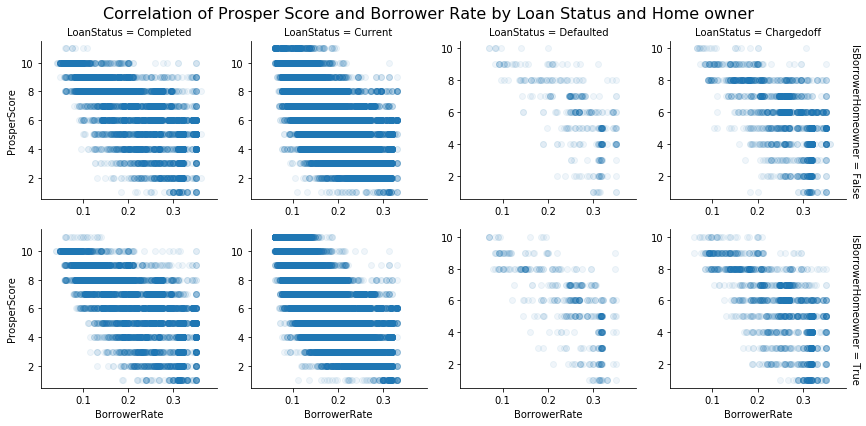

In [29]:
# scatter plot for borrowerrate, prosper score, by isborrowerhomeowner and loan status
g = sb.FacetGrid(data = df, row = 'IsBorrowerHomeowner', col = 'LoanStatus', 
                 col_order = ['Completed', 'Current', 'Defaulted', 'Chargedoff'], margin_titles = True, sharey = False)
g.map(plt.scatter, 'BorrowerRate', 'ProsperScore', alpha = 1/15)

g.fig.suptitle('Correlation of Prosper Score and Borrower Rate by Loan Status and Home owner', size = 16)
g.fig.subplots_adjust(top = .9);

From this faceted scatter plot, we can analyze that some how the prosper score is decreasing when the borrower rate is increasing. And also in the plot there is a high distribution on Completed and Current loan status. Since this Loan status are selected from other because of their high distribution than others.

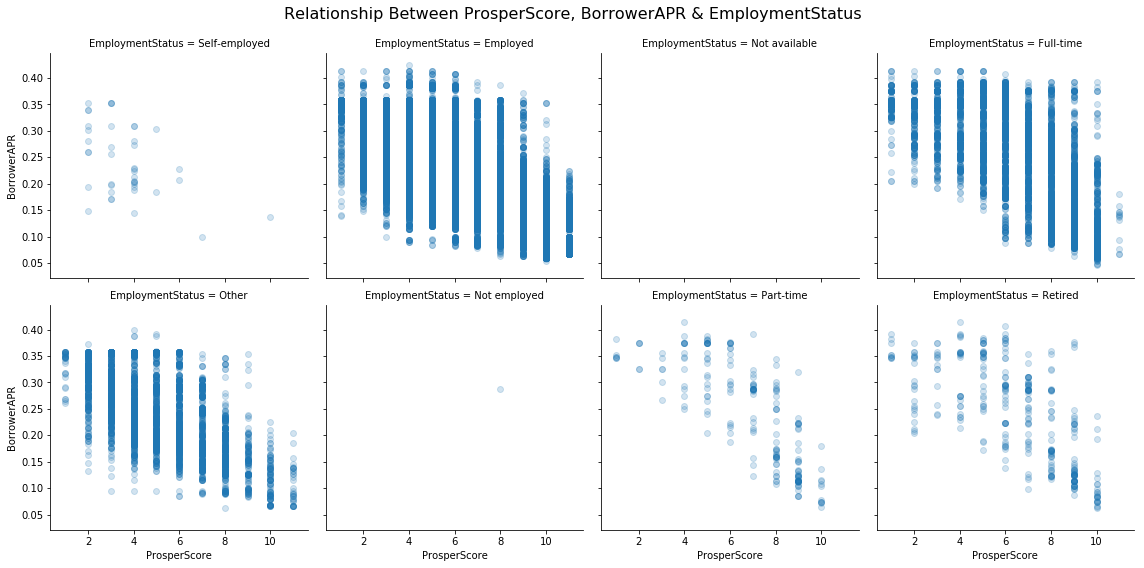

In [61]:
#Creating scatter for multivariate exploration
g = sb.FacetGrid(data = df, col = 'EmploymentStatus', size = 4, col_wrap = 4)
g.map(plt.scatter, 'ProsperScore', 'BorrowerAPR', alpha = 1/5)
g.fig.suptitle('Relationship Between ProsperScore, BorrowerAPR & EmploymentStatus', size = 16);
g.fig.subplots_adjust(top = .9);

In this exploration, we have seen that thier is high coorelation between BorrowerAPR and Prosper Score. And also the distribution among the employment status.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

As I explained above using the borrower's prosper score we have explored a good distrubtion that explains more about a borrowers interest rate and Status.  
On the second multivariate plot we can observe that there is no coorelation on employment status of self-employed, not available, not employed, part-time and retired. On the other hand there is a high coorelation on Employed, and Full timea and also on not listed status of borrower employment.

### Were there any interesting or surprising interactions between features?

In this section of our exploration we didn't seen any surprising interactions between features. we found just as we expected and seen in our previous univariate and bivariate exploration.

## Conclusions

In this Prosper Data set analysis we have explored and observed many things. Not all variables, but we selected some interest features and observed that.  
We have observed the high coorelation between prosper score and borrower interest rate. The distribution of borrowers employment status, loan status, borrowers monthly income and also we have seen, if a borrowers owning a home would affect the borrowers interest rate and other key features.  

We have explored on our feature of interest starting from univariate exploration, then bivariate exploration and finaly we have seen some multivariate exploration. In those exploration we have seen that many borrowers are Employed, thier monthly income is under 25,000 and also we have listed the top 15 where the most borrowers are from.
